In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.metrics import mean_squared_error
# from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data
df_train = pd.read_csv("Train.csv")
df_train['Datetime'] = pd.to_datetime(df_train.Datetime, format='%Y/%m/%d')
df_test = pd.read_csv("Test.csv")
df_test['Datetime'] = pd.to_datetime(df_test.Datetime, format='%Y/%m/%d')

train = np.asarray(df_train.iloc[:,1])
test = np.asarray(df_test.iloc[:,1])
# 此时train和test都是ndarray

# AR

In [3]:
from statsmodels.tsa.ar_model import AutoReg

# 从1至10遍历找最优自回归阶数
bestlags,mse=1,100
for i in range(10):
    ar = AutoReg(train,lags=i,trend='n',seasonal=True,period=365).fit()
    ar_pre = ar.predict(start=len(train),end=len(train)+len(test)-1)
    if mse > mean_squared_error(test,ar_pre):
        bestlags, mse = i, mean_squared_error(test,ar_pre)
    
ar = AutoReg(train,lags=bestlags,trend='n',seasonal=True,period=365).fit()
ar_pre = ar.predict(start=len(train),end=len(train)+len(test)-1)

bestlags

5

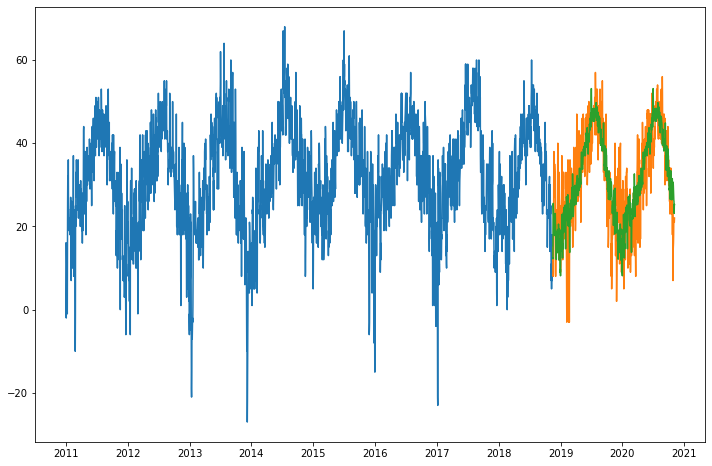

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(df_train.Datetime, train, label='Train')
plt.plot(df_test.Datetime, test, label='Test')
plt.plot(df_test.Datetime, ar_pre, label='AR')
plt.show()

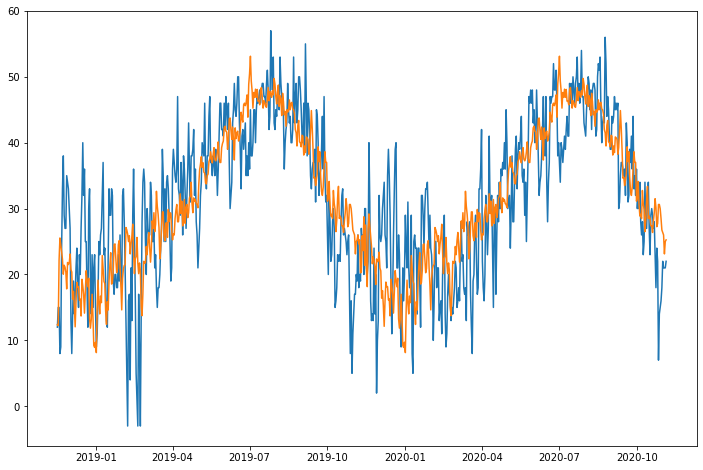

In [6]:
# 这个图只有预测的部分
plt.figure(figsize=(12, 8))
# plt.plot(df_train.Datetime, train[predictname], label='train')
plt.plot(df_test.Datetime, test, label='Test')
plt.plot(df_test.Datetime, ar_pre, label='AR')
plt.show()

In [7]:
# mean square error
print("mse of AR: ", mse)
# 63.64850836606458

mse of AR:  63.64850836606458


In [8]:
pd.DataFrame(ar_pre).to_csv('result_AR.csv',index = False)
# 预测的结果，只有预测值，没有拟合值

# ARIMA（没有跑出来）

In [ ]:
import pmdarima as pm
from pmdarima import model_selection

arima = pm.auto_arima(train,start_p=0,   # p最小值
                      start_q=0,   # q最小值
                      test='adf',  # ADF检验确认差分阶数d
                      max_p=5,     # p最大值
                      max_q=5,     # q最大值
                      m=365,        # 季节性周期长度，当m=1时则不考虑季节性
                      d=None,      # 通过函数来计算d
                      seasonal=True, start_P=0, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True,
                      stepwise=False  # stepwise为False则不进行完全组合遍历
                      )
# 跑不出来的，内存不够。不要试图跑，不然电脑会死机
arima_pre = arima.predict(test.shape[0])

In [ ]:
plt.figure(figsize=(12, 8))  # large picture
plt.plot(df_train.Datetime, train, label='Train')
plt.plot(df_test.Datetime, test, label='Test')
plt.plot(df_test.Datetime, arima_pre, label='SARIMA')
plt.show()

In [ ]:
# mean square error
print("mse of ARIMA: ", mean_squared_error(test,arima_pre))
